In [85]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read Dataset

In [86]:
files=os.listdir('/content/drive/MyDrive/Colab Notebooks/DS Satyam/Projects/Sriram Solar Project/data')
merged_data = pd.DataFrame()
for i in files:
  path=os.path.join('/content/drive/MyDrive/Colab Notebooks/DS Satyam/Projects/Sriram Solar Project/data',i)
  df=pd.read_csv(path)
  merged_data = pd.concat([merged_data, df],ignore_index=True)

In [87]:
data=merged_data.drop(columns=['Unnamed: 0'])

In [88]:
data.head()

,Timestamp,Ambient Temperature [deg C],Module Temperature [deg C],Solar Irradiation [W/m2]_x,Wind Speed [Km/hr],Relative Humidity [%],Output Active Power [kWp]
0,30-04-2023 20:00,21.69,30.6,0.0,0.667,91.56,0.00
1,30-04-2023 19:30,21.50,31.0,0.0,1.667,94.50,0.02
2,30-04-2023 19:00,21.31,30.4,0.0,1.778,92.94,0.02
3,30-04-2023 18:30,21.56,30.8,0.0,2.000,91.88,0.11
4,30-04-2023 18:00,21.63,31.2,0.0,1.222,95.06,0.27


### Preprocessing in Time Column

In [89]:
data['Timestamp']=pd.to_datetime(data['Timestamp'],format='%d-%m-%Y %H:%M')

In [90]:
data.dtypes

Timestamp                      datetime64[ns]
Ambient Temperature [deg C]           float64
Module Temperature [deg C]            float64
Solar Irradiation [W/m2]_x            float64
Wind Speed [Km/hr]                    float64
Relative Humidity [%]                 float64
Output Active Power [kWp]             float64
dtype: object

In [91]:
data['Month']=data['Timestamp'].dt.month_name()
data['Month'].value_counts()

May          896
March        805
April        784
August       758
November     711
January      705
December     687
February     681
June         650
September    630
July         538
October      346
Name: Month, dtype: int64

In [92]:
data['Time']=data['Timestamp'].dt.time
data['Day']=data['Timestamp'].dt.day

In [93]:
data.sample(5)

,Timestamp,Ambient Temperature [deg C],Module Temperature [deg C],Solar Irradiation [W/m2]_x,Wind Speed [Km/hr],Relative Humidity [%],Output Active Power [kWp],Month,Time,Day
7169,2022-11-03 08:00:00,20.56,30.6,64.0,1.111,77.19,2.73,November,08:00:00,3
202,2023-04-23 17:30:00,32.19,46.2,86.0,0.556,23.00,7.41,April,17:30:00,23
4144,2022-07-04 07:30:00,31.44,45.4,340.0,1.333,79.31,12.72,July,07:30:00,4
6850,2022-11-16 13:00:00,28.31,48.6,548.0,2.889,30.00,36.52,November,13:00:00,16
4983,2023-03-25 11:30:00,28.19,52.6,812.0,2.889,57.31,51.04,March,11:30:00,25


#### Month wise average power generation

In [94]:
data.groupby(by=['Month'])['Output Active Power [kWp]'].agg(['mean']).sort_values(['mean'],ascending=False)

,mean
Month,
May,25.777132
April,25.322908
July,25.002621
February,23.298855
June,23.267769
September,22.575222
March,22.144360
August,21.541504
October,21.072283


### Converting Time and Day into Cyclic Feature

In [95]:
data['hour']=data['Timestamp'].dt.hour
data['minute']=data['Timestamp'].dt.minute
data['time']=data['hour']+data['minute']/60

In [96]:
data.head()

,Timestamp,Ambient Temperature [deg C],Module Temperature [deg C],Solar Irradiation [W/m2]_x,Wind Speed [Km/hr],Relative Humidity [%],Output Active Power [kWp],Month,Time,Day,hour,minute,time
0,2023-04-30 20:00:00,21.69,30.6,0.0,0.667,91.56,0.00,April,20:00:00,30,20,0,20.0
1,2023-04-30 19:30:00,21.50,31.0,0.0,1.667,94.50,0.02,April,19:30:00,30,19,30,19.5
2,2023-04-30 19:00:00,21.31,30.4,0.0,1.778,92.94,0.02,April,19:00:00,30,19,0,19.0
3,2023-04-30 18:30:00,21.56,30.8,0.0,2.000,91.88,0.11,April,18:30:00,30,18,30,18.5
4,2023-04-30 18:00:00,21.63,31.2,0.0,1.222,95.06,0.27,April,18:00:00,30,18,0,18.0


In [97]:
data['hour_cos']=np.cos((2*np.pi*data['time'])/24)
data['hour_sin']=np.sin((2*np.pi*data['time'])/24)

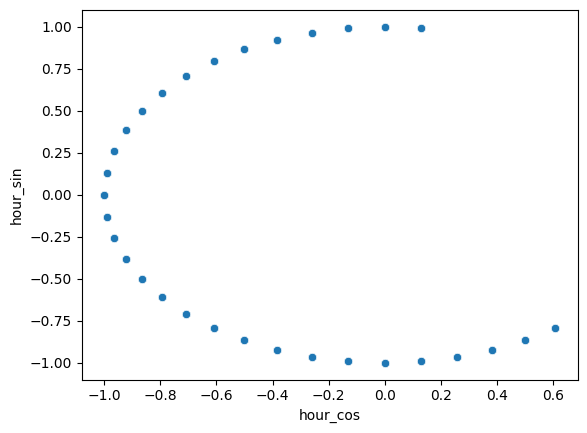

In [98]:
sns.scatterplot(x=data['hour_cos'],y=data['hour_sin'])
plt.show()

In [99]:
data['Day_cos']=np.cos((2*np.pi*data['Day'])/31)
data['Day_sin']=np.sin((2*np.pi*data['Day'])/31)

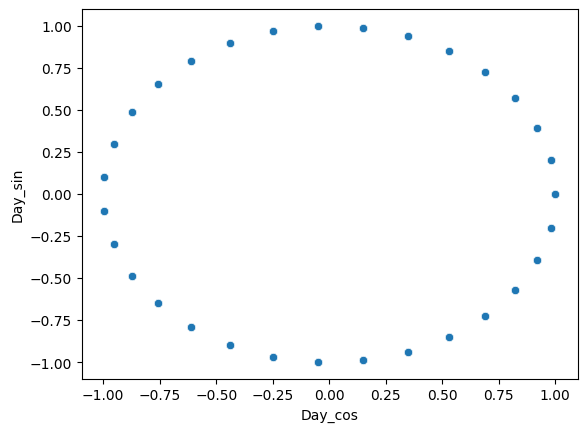

In [100]:
sns.scatterplot(x=data['Day_cos'],y=data['Day_sin'])
plt.show()

In [101]:
df=data[['Ambient Temperature [deg C]','Module Temperature [deg C]','Solar Irradiation [W/m2]_x','Relative Humidity [%]','Output Active Power [kWp]',
      'Month','hour_cos','hour_sin','Day_cos','Day_sin']]

In [102]:
df.head()

,Ambient Temperature [deg C],Module Temperature [deg C],Solar Irradiation [W/m2]_x,Relative Humidity [%],Output Active Power [kWp],Month,hour_cos,hour_sin,Day_cos,Day_sin
0,21.69,30.6,0.0,91.56,0.00,April,5.000000e-01,-0.866025,0.97953,-0.201299
1,21.50,31.0,0.0,94.50,0.02,April,3.826834e-01,-0.923880,0.97953,-0.201299
2,21.31,30.4,0.0,92.94,0.02,April,2.588190e-01,-0.965926,0.97953,-0.201299
3,21.56,30.8,0.0,91.88,0.11,April,1.305262e-01,-0.991445,0.97953,-0.201299
4,21.63,31.2,0.0,95.06,0.27,April,-1.836970e-16,-1.000000,0.97953,-0.201299


In [103]:
df.dtypes

Ambient Temperature [deg C]    float64
Module Temperature [deg C]     float64
Solar Irradiation [W/m2]_x     float64
Relative Humidity [%]          float64
Output Active Power [kWp]      float64
Month                           object
hour_cos                       float64
hour_sin                       float64
Day_cos                        float64
Day_sin                        float64
dtype: object

<ipython-input-104-722ae8c4db67>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,square=True,cmap='Blues')


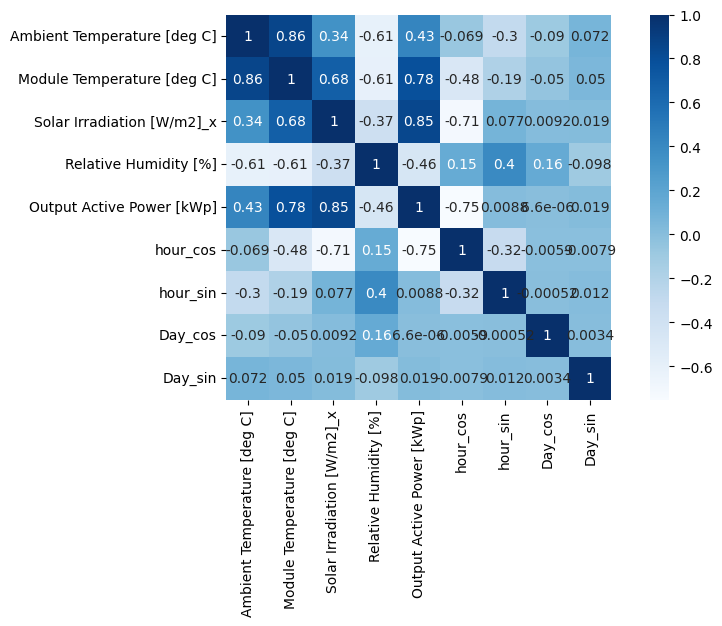

In [104]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,square=True,cmap='Blues')
plt.show()

In [105]:
df.corr()['Output Active Power [kWp]']

<ipython-input-105-0a0fc9bfaa03>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Output Active Power [kWp]']


Ambient Temperature [deg C]    0.430820
Module Temperature [deg C]     0.781457
Solar Irradiation [W/m2]_x     0.845449
Relative Humidity [%]         -0.460421
Output Active Power [kWp]      1.000000
hour_cos                      -0.751172
hour_sin                       0.008803
Day_cos                        0.000007
Day_sin                        0.018965
Name: Output Active Power [kWp], dtype: float64

In [106]:
df=df.drop(columns=['Relative Humidity [%]']).reset_index(drop=True)

#### Preprocessing in output Column

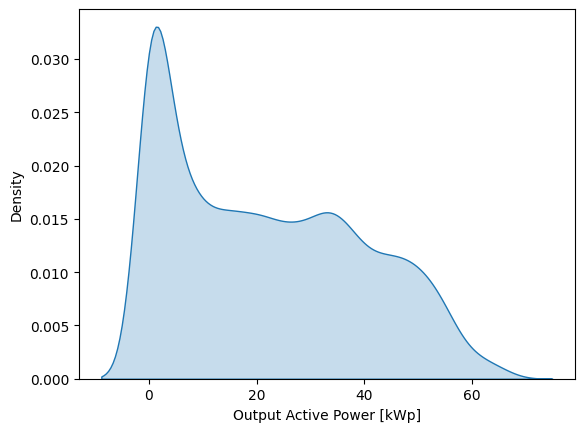

In [107]:
sns.kdeplot(df['Output Active Power [kWp]'],fill=True)
plt.show()

In [108]:
from sklearn.preprocessing import PowerTransformer
y=df[['Output Active Power [kWp]']]
pt=PowerTransformer()
y_trans=pt.fit_transform(y)


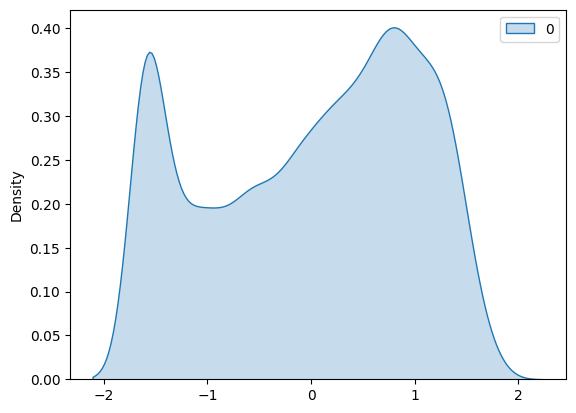

In [109]:
sns.kdeplot(y_trans,fill=True)
plt.show()

In [110]:
x=df.drop(columns=['Output Active Power [kWp]'])

### Train Test Split

In [111]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y_trans,test_size=0.2,random_state=2)

In [112]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(6552, 8)
(1639, 8)
(6552, 1)
(1639, 1)


### Column Transformer

In [113]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error

In [114]:
[i for i in x_train.columns]

['Ambient Temperature [deg C]',
 'Module Temperature [deg C]',
 'Solar Irradiation [W/m2]_x',
 'Month',
 'hour_cos',
 'hour_sin',
 'Day_cos',
 'Day_sin']

In [115]:
num_col=['Ambient Temperature [deg C]','Solar Irradiation [W/m2]_x','hour_cos', 'hour_sin', 'Day_cos', 'Day_sin','Module Temperature [deg C]']

In [116]:
step1=ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(sparse=False,drop='first'),['Month']),
    ('tnf2',StandardScaler(),num_col)
],remainder='passthrough')

In [117]:
x_train_trans=step1.fit_transform(x_train)
x_test_trans=step1.transform(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Model Building

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

##### Linear Regression

In [119]:
step2=LinearRegression()
pipe=Pipeline([('step2',step2)])
pipe.fit(x_train_trans,y_train)
pipe.score(x_test_trans,y_test)

0.8888784286516392

##### KNeighbors

In [132]:
step2=KNeighborsRegressor(n_neighbors=3)
pipe=Pipeline([('step2',step2)])
pipe.fit(x_train_trans,y_train)
pipe.score(x_test_trans,y_test)

0.9116162426138559

##### DecisionTreeRegressor

In [133]:
step2=DecisionTreeRegressor()
pipe=Pipeline([('step2',step2)])
pipe.fit(x_train_trans,y_train)
pipe.score(x_test_trans,y_test)

0.8733065864991334

#### Random Forest

In [134]:
step2=RandomForestRegressor()
pipe=Pipeline([('step2',step2)])
pipe.fit(x_train_trans,y_train)
pipe.score(x_test_trans,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


0.9311767765160658

##### XGBoost

In [136]:
step2=XGBRegressor()
pipe=Pipeline([('step2',step2)])
pipe.fit(x_train_trans,y_train)
pipe.score(x_test_trans,y_test)

0.9335842999978279

##### Artificial Neural Networks

In [137]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [138]:
model=Sequential()
model.add(Dense(36,activation='relu',input_dim=18,kernel_initializer='he_normal'))
model.add(Dense(18,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(9,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='linear'))

In [139]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                684       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1531 (5.98 KB)
Trainable params: 1531 (5.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [141]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [142]:
history=model.fit(x_train_trans,y_train,epochs=40,validation_data=(x_test_trans,y_test))

Epoch 1/40
205/205 [==============================] - 4s 10ms/step - loss: 0.3345 - val_loss: 0.1126
Epoch 2/40
205/205 [==============================] - 2s 8ms/step - loss: 0.1018 - val_loss: 0.0956
Epoch 3/40
205/205 [==============================] - 1s 4ms/step - loss: 0.0880 - val_loss: 0.0862
Epoch 4/40
205/205 [==============================] - 0s 2ms/step - loss: 0.0802 - val_loss: 0.0827
Epoch 5/40
205/205 [==============================] - 1s 3ms/step - loss: 0.0758 - val_loss: 0.0802
Epoch 6/40
205/205 [==============================] - 0s 2ms/step - loss: 0.0723 - val_loss: 0.0791
Epoch 7/40
205/205 [==============================] - 0s 2ms/step - loss: 0.0703 - val_loss: 0.0773
Epoch 8/40
205/205 [==============================] - 0s 2ms/step - loss: 0.0685 - val_loss: 0.0779
Epoch 9/40
205/205 [==============================] - 0s 2ms/step - loss: 0.0666 - val_loss: 0.0763
Epoch 10/40
205/205 [==============================] - 0s 2ms/step - loss: 0.0655 - val_loss: 0.074

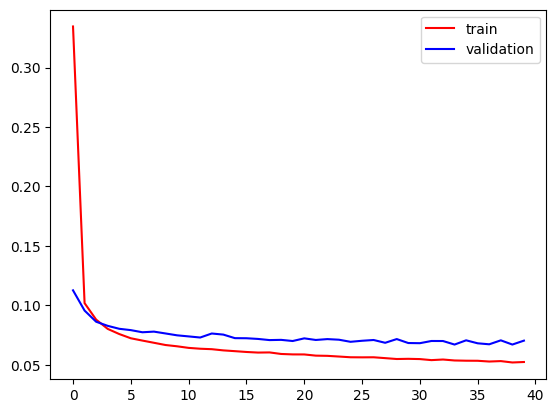

In [143]:

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [144]:
y_pred=model.predict(x_test_trans)
r2_score(y_test,y_pred)

52/52 [==============================] - 0s 4ms/step


0.9280274539562848